<a href="https://colab.research.google.com/github/sohagalam2/Python-Code-Practice/blob/master/Pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn ##nn contains all of pytorch's building block for neural network
import matplotlib.pyplot as plt

#check pythorch version
torch.__version__

'2.9.0+cu126'

##Data Preparing and loading
*Data can be almost anything ... in machine learing

*Excel spreadsheet

*Imanges of anykind

*Text

*Audio

Machine learning is a game of two parts:
  
  1.Get data into a numerical representation
  
  2. Build model to learn patterns in that numerical representation


We will use a linear regression formula to make straight line with *known* **parameters** - parameters is something model learn.

In [2]:
#create a known parameters
#for the formula y = a + bx , here bias=a, weight=b
weight = 0.7
bias = 0.3

#create some value here

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [3]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets (one of the most important concept of machine learning in general)

In [4]:
#create train/split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # বাকি ডেটা গুলো এখানে নেওয়া হচ্ছে এই আরকি।
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

*visualize, visualize, visualize*

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):


  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  #Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    #show the legend
    plt.legend(prop={"size":14})


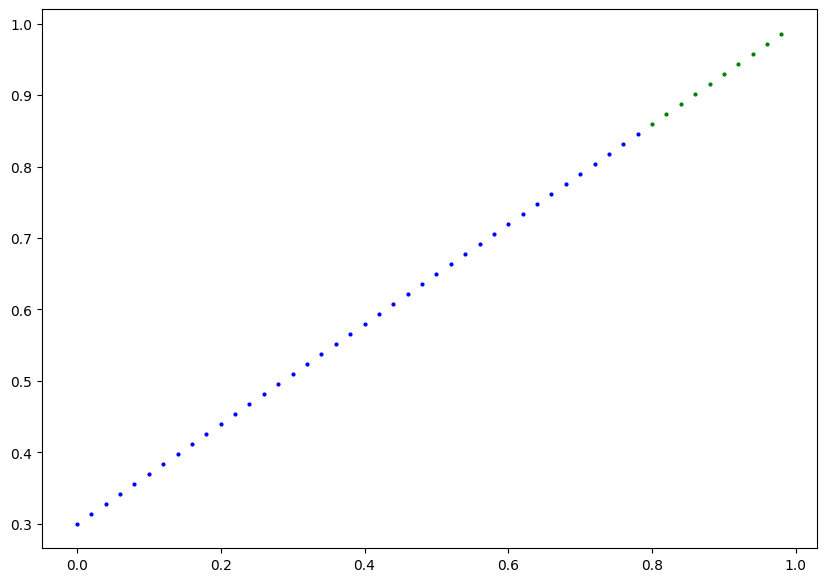

In [6]:
plot_predictions()

## 2. Build Model

Our first pytorch Model

This is very exciting

In [7]:
# Create a linear regression model class

class LinearRegressionModel(nn.Module): # <-- almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    #initialize the model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #forward method to define computation in the model
    def forward(self, x: torch.tensor) ->torch.tensor:
      return self.weights*x + self.bias